In [ ]:
%pip install imageio
%pip install scipy
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img = Image.open('balloons_noisy.png')
img.show()

# 1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:


- Image inverse transformation (I)

- Gamma-Correction (G)

- Log Transformation (L)

- Histogram equalization (H)

- Contrast Stretching (C)

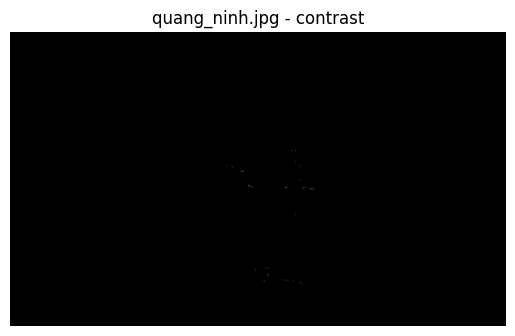

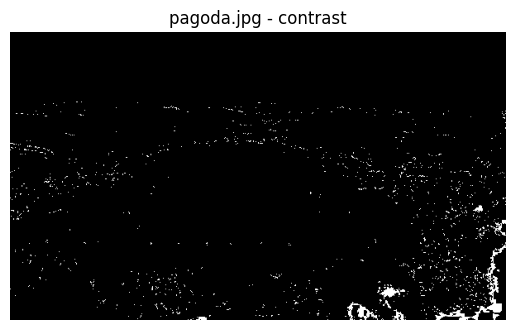

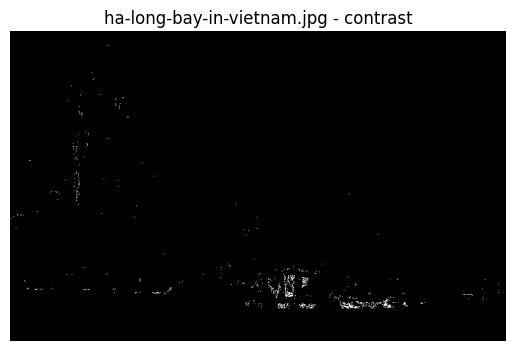

In [12]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

image_list = ['quang_ninh.jpg', 'pagoda.jpg', 'ha-long-bay-in-vietnam.jpg']

def inverse_transform(img_arr):
    return 255 - img_arr

def gamma_correction(img_arr, gamma=0.5):
    img_float = img_arr.astype(float)
    normalized = img_float / np.max(img_float)
    gamma_corrected = np.power(normalized, gamma) * 255
    return gamma_corrected.astype(np.uint8)

def log_transform(img_arr):
    img_float = img_arr.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return log_img.astype(np.uint8)

def histogram_equalization(img_arr):
    hist, bins = np.histogram(img_arr.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img_eq = cdf[img_arr.flatten()]
    return img_eq.reshape(img_arr.shape)

def contrast_stretching(img_arr):
    a = np.min(img_arr)
    b = np.max(img_arr)
    stretched = (img_arr - a) * 255 / (b - a)
    return stretched.astype(np.uint8)

def process_images(choice):
    for filename in image_list:
        filepath = os.path.join(input_folder, filename)
        img = Image.open(filepath).convert('L')
        img_arr = np.asarray(img)

        if choice == 'I':
            result = inverse_transform(img_arr)
            method = "inverse"
        elif choice == 'G':
            result = gamma_correction(img_arr)
            method = "gamma"
        elif choice == 'L':
            result = log_transform(img_arr)
            method = "log"
        elif choice == 'H':
            result = histogram_equalization(img_arr)
            method = "hist_eq"
        elif choice == 'C':
            result = contrast_stretching(img_arr)
            method = "contrast"
        else:
            print("❌ Lựa chọn không hợp lệ.")
            return

        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_{method}.png")
        Image.fromarray(result).save(output_path)

        plt.figure()
        plt.title(f"{filename} - {method}")
        plt.imshow(result, cmap='gray')
        plt.axis('off')
        plt.show()
process_images('C')


2. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như
sau:
- Fast Fourier
- Butterworth Lowpass Filter
- Butterworth Highpass Filter
Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình
trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.


C:\Users\taibb\AppData\Local\Temp\ipykernel_18952\1738626740.py:54: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (cutoff / D)**(2 * order))


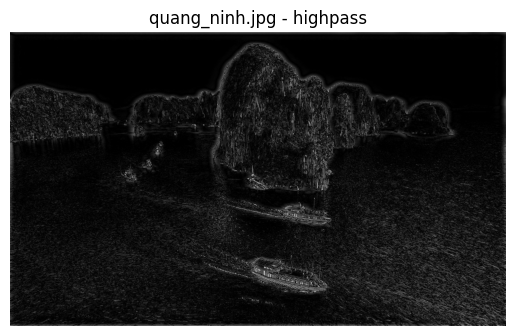

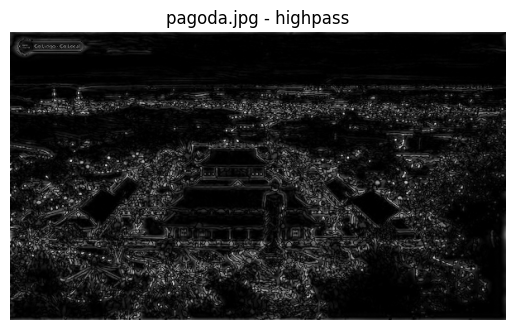

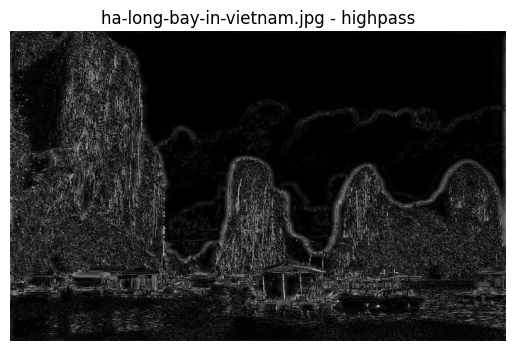

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

image_list = ['quang_ninh.jpg', 'pagoda.jpg', 'ha-long-bay-in-vietnam.jpg']

def save_and_show(result, filename, method):
    output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_{method}.png")
    Image.fromarray(result).save(output_path)
    plt.figure()
    plt.title(f"{filename} - {method}")
    plt.imshow(result, cmap='gray')
    plt.axis('off')
    plt.show()

def fast_fourier(img_arr):
    f = np.fft.fft2(img_arr)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.clip(magnitude_spectrum, 0, 255).astype(np.uint8)

def butterworth_lowpass(img_arr, cutoff=30, order=2):
    rows, cols = img_arr.shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)

    H = 1 / (1 + (D / cutoff)**(2 * order))

    F = np.fft.fft2(img_arr)
    F_shifted = np.fft.fftshift(F)
    G = H * F_shifted
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.clip(np.abs(img_back), 0, 255).astype(np.uint8)

def butterworth_highpass(img_arr, cutoff=30, order=2):
    rows, cols = img_arr.shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)

    H = 1 / (1 + (cutoff / D)**(2 * order))
    H[D == 0] = 0

    F = np.fft.fft2(img_arr)
    F_shifted = np.fft.fftshift(F)
    G = H * F_shifted
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.clip(np.abs(img_back), 0, 255).astype(np.uint8)

def process_frequency_images(choice):
    for filename in image_list:
        filepath = os.path.join(input_folder, filename)
        img = Image.open(filepath).convert('L')
        img_arr = np.asarray(img)

        if choice == 'F':
            result = fast_fourier(img_arr)
            method = "fft"
        elif choice == 'L':
            result = butterworth_lowpass(img_arr)
            method = "lowpass"
        elif choice == 'H':
            result = butterworth_highpass(img_arr)
            method = "highpass"
        else:
            print("❌ Lựa chọn không hợp lệ.")
            return

        save_and_show(result, filename, method)

process_frequency_images('H')

3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu
nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.


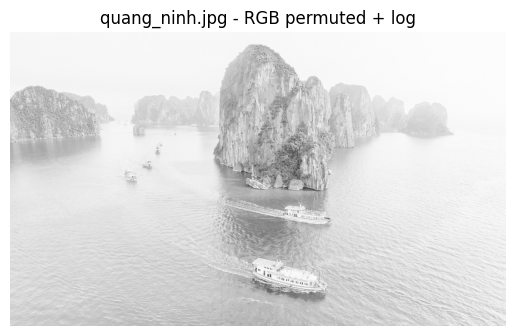

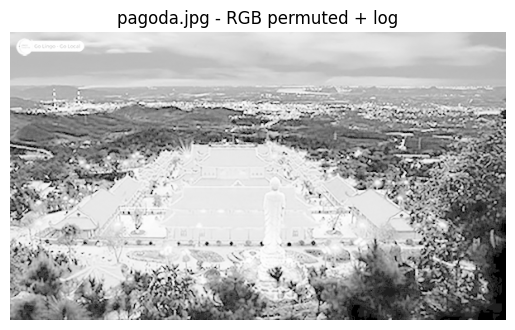

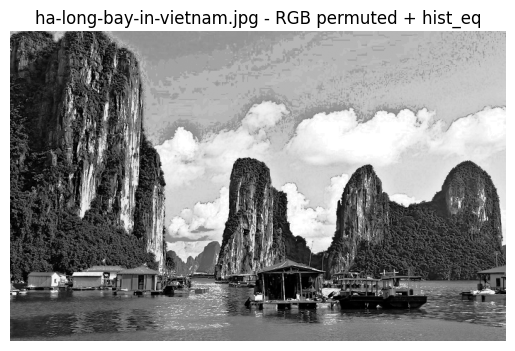

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

image_list = ['quang_ninh.jpg', 'pagoda.jpg', 'ha-long-bay-in-vietnam.jpg']

def inverse_transform(img_arr):
    return 255 - img_arr

def gamma_correction(img_arr, gamma=0.5):
    img_float = img_arr.astype(float)
    normalized = img_float / np.max(img_float)
    gamma_corrected = np.power(normalized, gamma) * 255
    return gamma_corrected.astype(np.uint8)

def log_transform(img_arr):
    img_float = img_arr.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return log_img.astype(np.uint8)

def histogram_equalization(img_arr):
    if len(img_arr.shape) == 3:
        img_arr = img_arr.mean(axis=2).astype(np.uint8)
    hist, bins = np.histogram(img_arr.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img_eq = cdf[img_arr.flatten()]
    return img_eq.reshape(img_arr.shape)

def contrast_stretching(img_arr):
    a = np.min(img_arr)
    b = np.max(img_arr)
    stretched = (img_arr - a) * 255 / (b - a)
    return stretched.astype(np.uint8)

def random_rgb_permutation(img_rgb):
    """Hoán đổi ngẫu nhiên thứ tự các kênh màu RGB"""
    channels = [0, 1, 2]
    random.shuffle(channels)
    return img_rgb[:, :, channels]

def apply_random_transform(img_arr):
    """Chọn ngẫu nhiên một trong các phép biến đổi"""
    transforms = [
        ('inverse', inverse_transform),
        ('gamma', gamma_correction),
        ('log', log_transform),
        ('hist_eq', histogram_equalization),
        ('contrast', contrast_stretching)
    ]
    method_name, func = random.choice(transforms)
    result = func(img_arr)
    return method_name, result

def process_random_rgb_and_transform():
    for filename in image_list:
        filepath = os.path.join(input_folder, filename)
        img = Image.open(filepath).convert('RGB')
        img_rgb = np.asarray(img)

        img_rgb_permuted = random_rgb_permutation(img_rgb)

        img_gray = Image.fromarray(img_rgb_permuted).convert('L')
        img_arr = np.asarray(img_gray)

        method, transformed = apply_random_transform(img_arr)

        output_filename = f"{os.path.splitext(filename)[0]}_RGBperm_{method}.png"
        output_path = os.path.join(output_folder, output_filename)
        Image.fromarray(transformed).save(output_path)

        plt.figure()
        plt.title(f"{filename} - RGB permuted + {method}")
        plt.imshow(transformed, cmap='gray')
        plt.axis('off')
        plt.show()

process_random_rgb_and_transform()


4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu
nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth
Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass
thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.


C:\Users\taibb\AppData\Local\Temp\ipykernel_18952\1417695143.py:31: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (cutoff / D)**(2 * order))


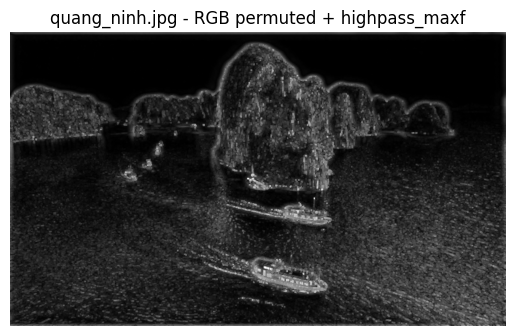

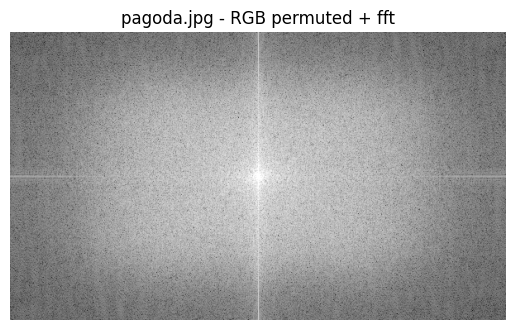

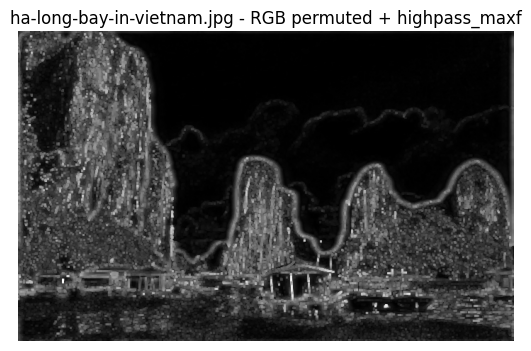

In [17]:
from scipy.ndimage import minimum_filter, maximum_filter

def fast_fourier(img_arr):
    f = np.fft.fft2(img_arr)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.clip(magnitude_spectrum, 0, 255).astype(np.uint8)

def butterworth_lowpass(img_arr, cutoff=30, order=2):
    rows, cols = img_arr.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    F = np.fft.fft2(img_arr)
    F_shifted = np.fft.fftshift(F)
    G = H * F_shifted
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.clip(np.abs(img_back), 0, 255).astype(np.uint8)

def butterworth_highpass(img_arr, cutoff=30, order=2):
    rows, cols = img_arr.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (cutoff / D)**(2 * order))
    H[D == 0] = 0
    F = np.fft.fft2(img_arr)
    F_shifted = np.fft.fftshift(F)
    G = H * F_shifted
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.clip(np.abs(img_back), 0, 255).astype(np.uint8)

def apply_min_filter(img_arr, size=3):
    return minimum_filter(img_arr, size=size)

def apply_max_filter(img_arr, size=3):
    return maximum_filter(img_arr, size=size)

def random_rgb_permutation(img_rgb):
    channels = [0, 1, 2]
    random.shuffle(channels)
    return img_rgb[:, :, channels]

def process_random_rgb_and_freq_transform():
    for filename in image_list:
        filepath = os.path.join(input_folder, filename)
        img = Image.open(filepath).convert('RGB')
        img_rgb = np.asarray(img)

        img_rgb_perm = random_rgb_permutation(img_rgb)

        img_gray = Image.fromarray(img_rgb_perm).convert('L')
        img_arr = np.asarray(img_gray)

        transforms = [
            ('fft', fast_fourier),
            ('lowpass', butterworth_lowpass),
            ('highpass', butterworth_highpass)
        ]
        method_name, func = random.choice(transforms)
        result = func(img_arr)

        if method_name == 'lowpass':
            result = apply_min_filter(result)
            method_name += '_minf'
        elif method_name == 'highpass':
            result = apply_max_filter(result)
            method_name += '_maxf'

        output_filename = f"{os.path.splitext(filename)[0]}_RGBperm_{method_name}.png"
        output_path = os.path.join(output_folder, output_filename)
        Image.fromarray(result).save(output_path)

        plt.figure()
        plt.title(f"{filename} - RGB permuted + {method_name}")
        plt.imshow(result, cmap='gray')
        plt.axis('off')
        plt.show()

process_random_rgb_and_freq_transform()
